In [8]:
import sys, pathlib, fitz
fname = 'Underwriting/Yash Paystub Nov 17 2023.pdf'
doc = fitz.open(fname)

for page in doc:
    tables = page.find_tables()
   
tables

In [3]:
def show_image(item, title=""):
    """Display a pixmap.

    Just to display Pixmap image of "item" - ignore the man behind the curtain.

    Args:
        item: any PyMuPDF object having a "get_pixmap" method.
        title: a string to be used as image title

    Generates an RGB Pixmap from item using a constant DPI and using matplotlib
    to show it inline of the notebook.
    """
    DPI = 150  # use this resolution
    import numpy as np
    import matplotlib.pyplot as plt

    # %matplotlib inline
    pix = item.get_pixmap(dpi=DPI)
    img = np.ndarray([pix.h, pix.w, 3], dtype=np.uint8, buffer=pix.samples_mv)
    plt.figure(dpi=DPI)  # set the figure's DPI
    plt.title(title)  # set title of image
    _ = plt.imshow(img, extent=(0, pix.w * 72 / DPI, pix.h * 72 / DPI, 0))

Table 0 column names: ['', None, None, None, None, None, None, None, None, None, None, None, 'Pay Date', None, None, None, None, None], external: False


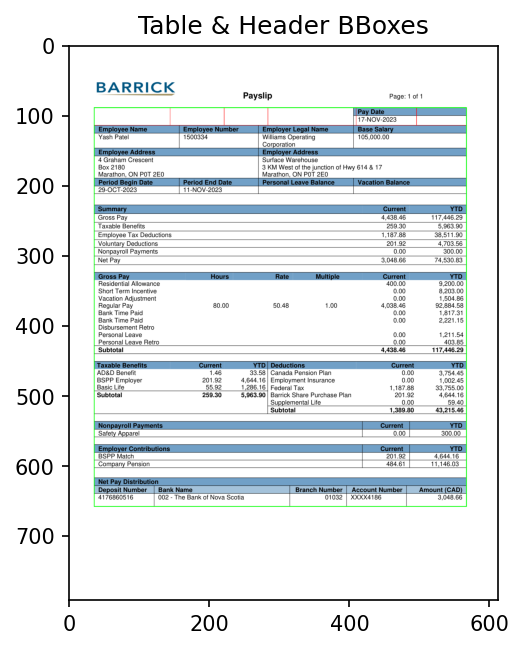

In [4]:
for i,tab in enumerate(tables):  # iterate over all tables
    for cell in tab.header.cells:
        page.draw_rect(cell,color=fitz.pdfcolor["red"],width=0.3)
    page.draw_rect(tab.bbox,color=fitz.pdfcolor["green"])
    print(f"Table {i} column names: {tab.header.names}, external: {tab.header.external}")
    
show_image(page, f"Table & Header BBoxes")